# Assignment 1: Black-Scholes Model and Binomial Tree



## Part I:  *Option Valuation*

In [1]:
# End time
T = 1
# number of steps
M = 50

# step_size
dt = T/M

# interest rate
r = 0.06

# stock Price
S = 100

# strike Price
K = 99
sigma = .2
M = 50

# 
a = np.exp(r*dt)

# up
u = np.exp(sigma*np.sqrt(dt))

# down
d = 1/u

# probability
p = (a - d) / (u - d)



In [36]:
# data matrix
data_dict = {}

T = 1
dt = T/M
r = 0.06
S = 100
K = 99
sigma = .2

M = 50    

a = np.exp(r*dt)
u = np.exp(sigma*np.sqrt(dt))
d = 1/u
p = (a - d) / (u - d)

W = np.zeros((M+1,1))

# asset price at time T
for n in range(0,M+1):
    W[n] = S*(u**(M-n))*(d**(n));

# option values at time T
for n in range(0,M+1):
    W[n] = max(W[n] - K,0)

# retrace to get option value at time zero
for i in range(M,0,-1):
    for n in range(0,i):
        W[n] = np.exp(-r*dt)*(p*W[n] + (1-p)*W[n+1])


print('Option value: ' +str(W[0][0]))
# print(data_dict)

Option value: 11.546434850755071


C:\Users\dirk_\Miniconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in double_scalars
  from ipykernel import kernelapp as app
C:\Users\dirk_\Miniconda3\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in add


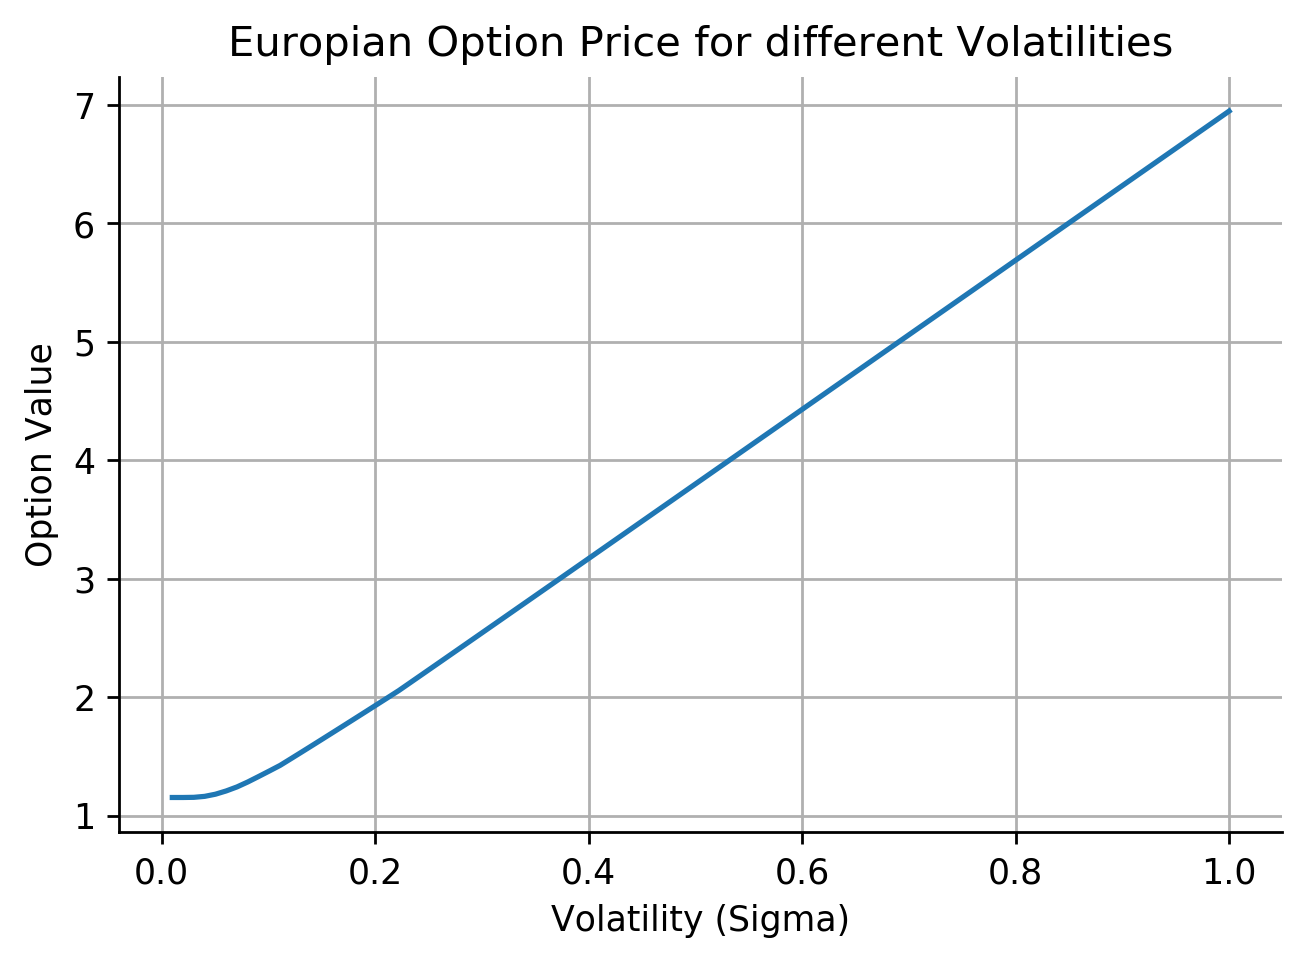

In [142]:
import numpy as np
# data matrix
data_dict = {}
W = np.zeros((M+1,1))
M = 50

sigmas = np.linspace(0,1,100)
x = sigmas
y = []
for sigma in sigmas:
    
    a = np.exp(r*dt)
    u = np.exp(sigma*np.sqrt(dt))
    d = 1/u
    p = (a - d) / (u - d)
    
    # asset price at time T
    for n in range(0,M+1):
        W[n] = S*(u**(M-n))*(d**(n));
    
    # option values at time T
    for n in range(0,M+1):
        W[n] = max(W[n] - K,0)
    
    # retrace to get option value at time zero
    for i in range(M,0,-1):
        for n in range(0,i):
            W[n] = np.exp(-r*dt)*(p*W[n] + (1-p)*W[n+1])
        if i == 2:
            # W[0] = W[n]
            # W[1] = W[n+1]

            f_up = W[0]
            f_down = W[1]
            S_up = S*u
            S_down = S*d
            
            delta = (f_up-f_down)/(S_up-S_down)
        
    y.append(W[0][0])
    data_dict[sigma] =  {"option_value" : W[0][0]}

plt.figure(dpi=250)
ax = plt.subplot(111)
ax.plot(x,y)
ax.set_xlabel('Volatility (Sigma)')
ax.set_ylabel('Option Value')
ax.set_title('Europian Option Price for different Volatilities')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid()
plt.savefig('./images/EU_OptionPrice_Volatilities.png', bbox_inches='tight')
plt.show()


#     print('Option value for sigma='+str(sigma)+': '+str(W[0][0]))
# print(data_dict)

In [136]:
import time
import matplotlib.pyplot as plt
import numpy as np
import array


# End time
T = 1
# number of steps
M = 50

# step_size
dt = T/M

# interest rate
r = 0.06

# stock Price
S = 100

# strike Price
K = 99
sigma = .2


steps = []
Ms = array.array('i',(i for i in range(50,2000, 50)))
for M in Ms:
    step = 0

    dt = T/M
    a = np.exp(r*dt)
    u = np.exp(sigma*np.sqrt(dt))
    d = 1/u
    p = (a - d) / (u - d)
    
    W = np.zeros((M+1,1))

    # asset price at time T
    for n in range(0,M+1):
        W[n] = S*(u**(M-n))*(d**(n));

    # option values at time T
    for n in range(0,M+1):
        W[n] = max(W[n] - K,0)
        step+=1
    
    # retrace to get option value at time zero
    for i in range(M,0,-1):
        for n in range(0,i):
            W[n] = np.exp(-r*dt)*(p*W[n] + (1-p)*W[n+1])
            step+=1
    
    
    steps.append(step)

#     print('duration for M='+str(M)+': '+str(duration))
    
# print(step)

ValueError: x and y must have same first dimension, but have shapes (39,) and (34,)

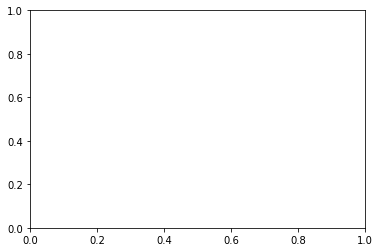

In [143]:
plt.plot(Ms,steps)
plt.xlabel('Number of Steps (N)')
plt.ylabel('Duration (s)')
plt.title('Computational Complexity')
ax = plt.subplot(111)
ax.plot(x,y)
ax.set_xlabel('Number of Timesteps (T/M)')
ax.set_ylabel('Duration (steps)')
ax.set_title('Computational Complexity')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid()
ax.show()

In [111]:
complexity = lambda N: N**2/2 + 2*(N+1)
complexity = lambda N: N*((N+1)+2)/2

complexity(51)

1377.0

In [92]:
import time
import matplotlib.pyplot as plt
# End time
T = 1
# number of steps
M = 50
# step_size
dt = T/M
# interest rate
r = 0.06
# stock Price
S = 100
# strike Price
K = 99
sigma = .2


def calc_option_price(T,M,option):
    dt = T/M
    a = np.exp(r*dt)
    u = np.exp(sigma*np.sqrt(dt))
    d = 1/u
    p = (a - d) / (u - d)

    W = np.zeros((M+1,1))
    
    # asset price at time T
    for n in range(0,M+1):
        W[n] = S*(u**(M-n))*(d**(n));

    # option values at time T
    for n in range(0,M+1):
        W[n] = max(W[n] - K,0)

    if option == 'put':
        # retrace to get option value at time zero
        for i in range(M,0,-1):
            for n in range(0,i):
                W[n] = np.exp(-r*dt)*(p*W[n] + (1-p)*W[n+1])

                # PUT - Strike price - stock price at given t
                W[n] = max(K-S*(u**(i-n-1))*(d**n), W[n])
                
    elif option == 'call':
        for i in range(M,0,-1):
            for n in range(0,i):
                W[n] = np.exp(-r*dt)*(p*W[n] + (1-p)*W[n+1])

                # CALL
                W[n] = max(S*(u**(i-n-1))*(d**n)-K, W[n])

    return W[0][0]

print("The option price for a American call: " + str(calc_option_price(T,M,'call')))
print("The option price for a American put: " + str(calc_option_price(T,M,'put')))

# CALL SHOULD BE THE SAME
# PUT SHOULD BE DIFFERENT

The option price for a American call: 11.546434850755071
The option price for a American put: 16.656388744581253


## Part II:  *Hedging Simulations*